In [ ]:
import pandas as pd

df = pd.read_csv('SpamDetectionData.txt')

print(df.head(3))

print("\nKolone u skupu podataka su:")
print(df.columns.tolist())


  Label                                            Message
0  Spam  <p>But could then once pomp to nor that glee g...
1  Spam  <p>His honeyed and land vile are so and native...
2  Spam  <p>Tear womans his was by had tis her eremites...

Kolone u skupu podataka su:
['Label', 'Message']


In [ ]:
import re
X = df['Message']
y = df['Label']

# Uklanjanje HTML tagova <p> i </p> iz poruka
X_cleaned = X.str.replace('<p>', '', regex=False).str.replace('</p>', '', regex=False)

def broj_slova(text):
    return len(re.findall(r'[A-Za-z]', text))

broj_slova_prva = broj_slova(X_cleaned.iloc[0])
broj_slova_druga = broj_slova(X_cleaned.iloc[1])

print(f"Broj slova u prvoj poruci: {broj_slova_prva}")
print(f"Broj slova u drugoj poruci: {broj_slova_druga}")

Broj slova u prvoj poruci: 329
Broj slova u drugoj poruci: 687


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
# d
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)  # Generira vokabular na osnovu trening podataka

# pretvaranje txta u nizove cijelih brojeva
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# rječnik {riječ: indeks}
word_counts = tokenizer.word_counts

# 3 najčesce riječi
najcesce = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:3]
print("Tri najčešće riječi su:", najcesce)

print("Prva rečenica iz trening skupa:", X_train.iloc[0])
print("Tokenizovana verzija:", X_train_seq[0])


Tri najčešće riječi su: [('the', 23042), ('and', 19393), ('of', 11189)]
Prva rečenica iz trening skupa: <p>Fluttered dreary a the of yore stock and curious we many wore the the radiant bust tapping sir this. The ghost distinctly and quoth angels the chamber broken or ghost sitting grave its this. The dreaming and art when adore and moment then and lord she lent i quoth adore tell mystery mefilled. Still nevermore the fiery above rare hath ever my and.</p><p>Lining each no peering mefilled token and one ghastly the. The seraphim the on the flutter there in to sad desolate gently many then my little. Name napping above said pondered from while.</p><p>Stood unseen came plume my horror there nevermore caught flitting again a still get or and thy muttered. Had to divining hath whether implore and human balm all it by guessing here have curtain such here. Explore my implore beating sitting. But nevermore tempter before sent my sought our for have. Till on grave censer this with into merely a

In [ ]:
# e
import numpy as np

#Pravi matricu dimenzija broj_rečenica x dimension
def vectorize_sequences(sequences, dimension=4000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for index in sequence:
            if index < dimension:  # Osiguraj da je index u granici
                results[i, index] = 1.0
    return results

# Pretvara svaku riječ u broj
def vectorize_labels(labels):
    return np.array([1 if label == 'spam' else 0 for label in labels])

X_train_vec = vectorize_sequences(X_train_seq, dimension=4000)
X_test_vec = vectorize_sequences(X_test_seq, dimension=4000)

y_train_vec = vectorize_labels(y_train)
y_test_vec = vectorize_labels(y_test)

print("Prva vektorizovana rečenica:", X_train_vec[0])
print("Labela (0 = ham, 1 = spam):", y_train_vec[0])

Prva vektorizovana rečenica: [0. 1. 1. ... 0. 0. 0.]
Labela (0 = ham, 1 = spam): 0


In [ ]:
# f
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(8, activation='relu', input_shape=(4000,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# g kompajliranje modela
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

NameError: name 'model' is not defined

In [ ]:
# h
# Treeniranje modela
# Definiraj broj dimenzija
dimension = 4000
# vektoriziranje ulazne podatke
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Vektoriziraj podatke
X_train_vectorized = vectorize_sequences(X_train_sequences, dimension)
X_test_vectorized = vectorize_sequences(X_test_sequences, dimension)


# vektoriziraj oznake
y_train_vectorized = vectorize_labels(y_train)
y_test_vectorized = vectorize_labels(y_test)

history = model.fit(
    X_train_vectorized, y_train_vectorized,  # Trening podaci i njihove etikete
    epochs=5,  # Broj epoha
    batch_size=128,  # Veličina batcha
    validation_split=0.3,  # 30% podataka se koristi za validaciju
    verbose=1  # Prikazuje napredak treniranja
)

# Prikaz grafova
import matplotlib.pyplot as plt

# grafički prikaz tačnosti
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Tačnost tokom treniranja')
plt.xlabel('Epoke')
plt.ylabel('Tačnost')
plt.legend()
plt.show()

# Grafički prikaz funkcije gubitka
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Gubitak tokom treniranja')
plt.xlabel('Epoke')
plt.ylabel('Gubitak')
plt.legend()
plt.show()

NameError: name 'tokenizer' is not defined

In [ ]:
# i evaluacija modela
test_loss, test_accuracy = model.evaluate(X_test_vectorized, y_test_vectorized)

print(f"Testna tačnost: {test_accuracy:.4f}")
print(f"Testni gubitak: {test_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0029 
Testna tačnost: 1.0000
Testni gubitak: 0.0031


In [ ]:
# j
new_message = "Ovo je moj primjer neke spam spam poruke!"

new_message_tokenized = tokenizer.texts_to_sequences([new_message])

# Vektorizacija poruke (koristim iste parametre kao za treniranje)
new_message_vectorized = vectorize_sequences(new_message_tokenized, dimension=4000)

prediction = model.predict(new_message_vectorized)

# Ispis rezultata
if prediction >= 0.5:
    print("Poruka je klasifikovana kao SPAM.")
else:
    print("Poruka je klasifikovana kao HAM.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Poruka je klasifikovana kao HAM.


In [ ]:
# 2
# a
import pandas as pd
df = pd.read_csv('stackoverflow.csv')

print(df.tail(3))

                                                   post  tags
1987  directory folder name to put user defined pack...  java
1988  send message to server java  i m creating chat...  java
1989  how to add pattern of  *  is url-pattern in we...  java


In [ ]:
# b
import pandas as pd
df = pd.read_csv('stackoverflow.csv')
X = df['post']  # Izdvajanje pitanja i
y = df['tags']  # i programskih jezika (labela)

unique_labels = y.unique()
num_unique_labels = len(unique_labels)
print(f'Jedinstveni jezici: {unique_labels}')
print(f'Broj jedinstvenih jezika: {num_unique_labels}')

Jedinstveni jezici: ['java' 'javascript' 'c#' 'python']
Broj jedinstvenih jezika: 4


In [ ]:
# c
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


y = df['tags']

# 1. Label Encoding tj mapiranje tekstualnih labela u cijele brojeve
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 2. One-hot enkodiranje
y_one_hot = to_categorical(y_encoded)

print(f"Prvih 5 labela nakon one-hot enkodiranja:\n", y_one_hot[:5])


Prvih 5 labela nakon one-hot enkodiranja:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [ ]:
# d
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f'Veličina trening skupa: {len(X_train)}')
print(f'Veličina test skupa: {len(X_test)}')

Veličina trening skupa: 1791
Veličina test skupa: 199


In [ ]:
# e
tokenizer = Tokenizer(num_words=500)  # uzima samo 500 najčešćih riječi
tokenizer.fit_on_texts(X_train)

# Konvertovanje teksta u sekvence brojeva = tokenizacija
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Vvektorizacija
dimension = 500
X_train_vectorized = vectorize_sequences(X_train_sequences, dimension)
X_test_vectorized = vectorize_sequences(X_test_sequences, dimension)

print("Prvih nekoliko vektoriziranih pitanja iz trening skupa:")
print(X_train_vectorized[:3])

# One-hot enkodiranje labela ispod
from sklearn.preprocessing import LabelEncoder

# prvo mapiramo tekstualne labele u brojeve
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot enkodiranje labela
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

print("\nOne-hot enkodirane labele za trening skup:")
print(y_train_one_hot[:3])

Prvih nekoliko vektoriziranih pitanja iz trening skupa:
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]

One-hot enkodirane labele za trening skup:
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [ ]:
# f
from keras.models import Sequential
from keras.layers import Dense

num_classes = y_train_one_hot.shape[1]
model = Sequential()

# Prvi sloj sa 32 neurona
model.add(Dense(32, input_dim=X_train_vectorized.shape[1], activation='relu'))

# Drugi sloj sa 8 neurona
model.add(Dense(8, activation='relu'))

# Izlazni sloj sa brojem neurona = broju klasa
model.add(Dense(num_classes, activation='softmax'))

# g
from keras.optimizers import Adam
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │          16,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,332 (63.80 KB)

 Trainable params: 16,332 (63.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3516 - loss: 1.2809 - val_accuracy: 0.7812 - val_loss: 0.7457
Epoch 2/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8715 - loss: 0.5537 - val_accuracy: 0.9018 - val_loss: 0.3425
Epoch 3/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9667 - loss: 0.1837 - val_accuracy: 0.9330 - val_loss: 0.2379
Epoch 4/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0954 - val_accuracy: 0.9308 - val_loss: 0.2238
Epoch 5/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - loss: 0.0617 - val_accuracy: 0.9397 - val_loss: 0.1883
Epoch 6/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9959 - loss: 0.0356 - val_accuracy: 0.9397 - val_loss: 0.1841
Epoch 7/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9996 - loss: 0.0224 - val_accuracy: 0.9509 - val_loss: 0.1847
Epoch 8/8
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 0.9420 - v

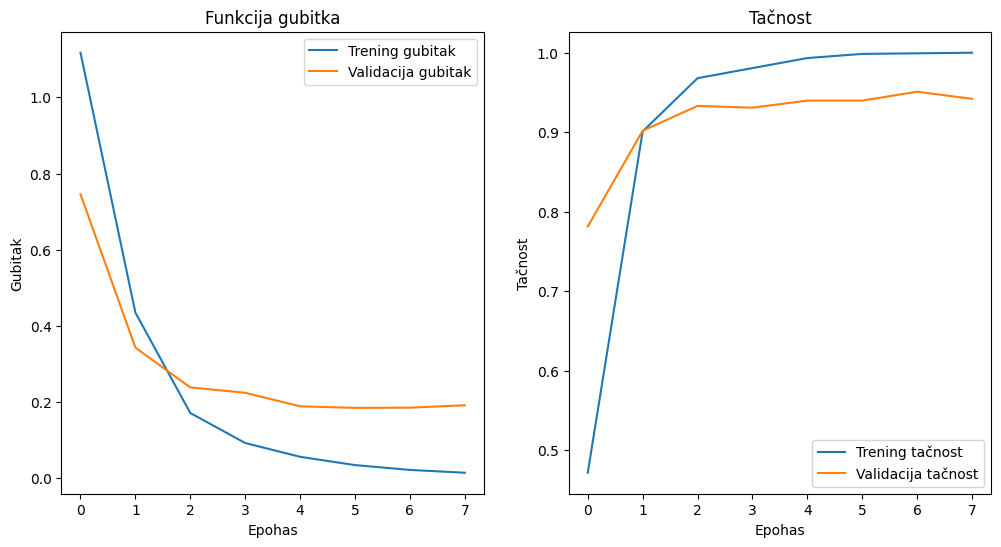

In [ ]:
# h
import matplotlib.pyplot as plt

history = model.fit(
    X_train_vectorized,  # Trening podaci
    y_train_one_hot,  # Trening etikete (one-hot enkodirane)
    epochs=8,  # Broj epoha
    batch_size=8,  # Veličina batcha
    validation_split=0.25  # 25% podataka za validaciju
)

test_loss, test_accuracy = model.evaluate(X_test_vectorized, y_test_one_hot)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

plt.figure(figsize=(12, 6))

# Gubitak tokom treninga i validacije
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Trening gubitak')
plt.plot(history.history['val_loss'], label='Validacija gubitak')
plt.title('Funkcija gubitka')
plt.xlabel('Epohas')
plt.ylabel('Gubitak')
plt.legend()

# Tačnost tokom treninga i validacije
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Trening tačnost')
plt.plot(history.history['val_accuracy'], label='Validacija tačnost')
plt.title('Tačnost')
plt.xlabel('Epohas')
plt.ylabel('Tačnost')
plt.legend()

plt.show()

In [ ]:
# i
test_loss, test_accuracy = model.evaluate(X_test_vectorized, y_test_one_hot)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9025 - loss: 0.3561
Test accuracy: 0.9045
Test loss: 0.3510
